#Regularized Logistic Regression

This Matlab code has been completed as part of [Machine Learning](https://www.coursera.org/learn/machine-learning)
course in Coursera given by Prof. Andrew Ng

------------

This note demonstrates the implementation of regularized logistic regression to predict whether microchips from a fabrication plant passes quality assurance (QA). During QA, each microchip goes through various tests to ensure
it is functioning correctly. Suppose you are the product manager of the factory and you have the
test results for some microchips on two different tests. From these two tests, you would like to determine whether the microchips should be accepted or rejected. To help you make the decision, you have a dataset of test results
on past microchips, from which you can build a logistic regression model.

This notebook includes:

- <a href='#part1'>Part 1: Visualizing the data</a>
- <a href='#part2'>Part 2: Feature mapping</a>
- <a href='#part3'>Part 3: Cost function and gradient</a> 
- <a href='#part4'>Part 4: Learning parameters using fminunc</a> 
- <a href='#part5'>Part 5: Various levels of regularization</a> 

This code requires the following functions
* <a href='#funcs_04_LogisticRegressionRegularized_costFunctionReg.m'>funcs_04_LogisticRegressionRegularized_costFunctionReg.m</a> 

### Part 1: Visualizing the data <a id='part1'></a>
Visualizing the data using *plotData* function, it shows the plot ith the axes are the two test scores, and the positive (y = 1, accepted) and negative (y = 0, rejected) examples are shown with different markers.

Figure shows that our dataset cannot be separated into positive and negative examples by a straight-line through the plot. Therefore, a straight-forward application of logistic regression will not perform well on this dataset
since logistic regression will only be able to find a linear decision boundary.

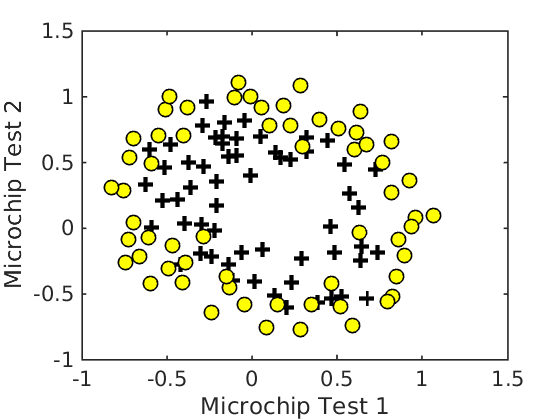

In [1]:
clear all; close all; clc;
data = load('./data/data_04_LogisticRegressionRegularized.txt');
X = data(:, [1, 2]); y = data(:, 3);

% Find positive and negative positions based on y
pos=find(y==1); neg=find(y==0);

figure; hold on;
plot(X(pos, 1), X(pos, 2), 'k+','LineWidth', 2, 'MarkerSize', 7);
plot(X(neg, 1), X(neg, 2), 'ko', 'MarkerFaceColor', 'y', 'MarkerSize', 7);
hold off;
xlabel('Microchip Test 1')
ylabel('Microchip Test 2')
%legend('y = 1', 'y = 0')
box on

### Part 2: Feature mapping <a id='part2'></a>
One way to fit the data better is to create more features from each data point. Here we will map the features into all polynomial terms of x 1 and x 2 up to the sixth power. As a result of this mapping, our vector of two features (the scores on two QA tests) has been transformed into a 28-dimensional vector. A logistic regression classifier trained on this higher-dimension feature vector will have a more complex decision boundary and will appear nonlinear when drawn in our 2-dimensional plot.

$$X_{new}=[1 \:\:\: x_1 \:\:\: x_2 \:\:\: x_1^2 \:\:\: x_1x_2 \:\:\: x_2^2 \:\:\: x_1^3 \:\:\: ... \:\:\: x_1x_2^5 \:\:\: x_2^6]^T$$

While the feature mapping allows us to build a more expressive classifier, it also more susceptible to overfitting. In the next parts of the exercise, you will implement regularized logistic regression to fit the data and also see for yourself how regularization can help combat the overfitting problem.

In [2]:
X1=X(:,1);
X2=X(:,2);

degree = 6;

% Add intercept term
X_feats = ones(size(X1(:,1)));

% Add Polynomial Features
for i = 1:degree
    for j = 0:i
        X_feats = [X_feats (X1.^(i-j)).*(X2.^j)];
    end
end

### Part 3: Cost function and gradient <a id='part3'></a>
Now you will implement code to compute the cost function and gradient for regularized logistic regression. Complete the code in *costFunctionReg.m* to return the cost and gradient. Recall that the regularized cost function in logistic regression is:

$$J(\theta)=\frac{1}{m}\sum_{i=1}^{m}\left[ -y^{(i)}log\left( h_{\theta}\left(x^{(i)}\right) \right) - \left(1-y^{(i)} \right)log\left( 1-h_{\theta}\left(x^{(i)}\right) \right)\right] + \frac{\lambda}{2m}\sum_{j=1}^{n}\theta_j^2$$

Remember **not** to regularize the parameter $\theta_0$. In Octave/MATLAB, recall that indexing starts from 1, hence, you should not be regularizing the theta(1) parameter (which corresponds to $\theta_0$ ) in the code. The gradient of the cost function is a vector where the j th element is defined as follows:

$$\frac{\partial J(\theta)}{\partial \theta_j}=\frac{1}{m}\sum_{i=1}^{m} \left(h_{\theta}\left(x^{(i)}\right) - y^{(i)}\right)x^{(i)}_j \qquad for \quad j= 0$$

and 

$$\frac{\partial J(\theta)}{\partial \theta_j}=\frac{1}{m}\sum_{i=1}^{m} \left(h_{\theta}\left(x^{(i)}\right) - y^{(i)}\right)x^{(i)}_j + \frac{\lambda}{m}\theta_j \qquad for \quad j\geq 1 $$

In [3]:
% Initialize fitting parameters
initial_theta = zeros(size(X_feats, 2), 1);

% Set regularization parameter lambda to 1
lambda = 1;

% Compute and display initial cost and gradient for regularized logistic
% regression
[cost, grad] = funcs_04_RegularizedLogisticRegression_costFunctionReg(initial_theta, X_feats, y, lambda);

fprintf('Cost at initial theta (zeros): %f\n', cost);

Cost at initial theta (zeros): 0.693147

### Part 4: Learning parameters using fminunc <a id='part4'></a>

Similar to the previous parts, you will use *fminunc* to learn the optimal parameters $\theta$.

In [4]:
% Initialize fitting parameters
initial_theta = zeros(size(X_feats, 2), 1);

% Set regularization parameter lambda to 1 (you should vary this)
lambda = 1;

% Set Options
options = optimset('GradObj', 'on', 'MaxIter', 400);

% Optimize
[theta, J, exit_flag] = fminunc(@(t)(funcs_04_RegularizedLogisticRegression_costFunctionReg(t, X_feats, y, lambda)), ...
                                     initial_theta, options);

% Compute accuracy on our training set
sigmoid=@(z) 1./(1+exp(-z));
p = sigmoid(X_feats*theta);
p(p>=0.5)=1; p(p<0.5)=0;
fprintf('Train Accuracy: %f\n', mean(double(p == y)) * 100);

Local minimum possible.

fminunc stopped because the final change in function value relative to 
its initial value is less than the default value of the function tolerance.



Train Accuracy: 83.050847

### Plotting the decision boundary

The function *plotDecisionBoundary.m* helps to plot the (non-linear) decision boundary that separates the positive and negative examples. The non-linear decision boundary is plotted by computing the classifier’s predictions on an evenly spaced grid and then and drew a contour plot of where the predictions change from y = 0 to y = 1.

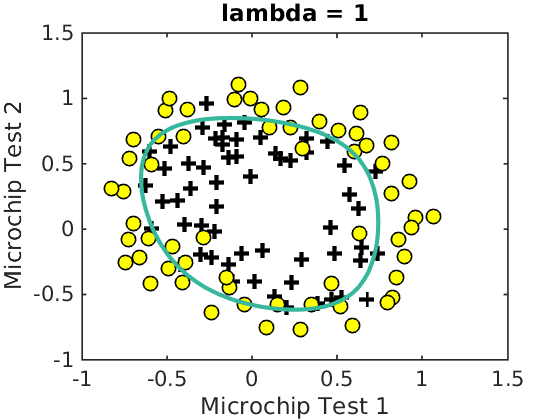

In [5]:
% Create a grid points and corresponding features
[u, v] = meshgrid(linspace(-1, 1.5, 50), linspace(-1, 1.5, 50));
u=u(:); v=v(:);

uv = ones(size(u(:,1)));
for i = 1:degree
    for j = 0:i
        uv = [uv (u.^(i-j)).*(v.^j)];
    end
end

% Evaluate z = theta*x over the grid
z = reshape(uv*theta, 50, 50);
u=reshape(u, 50, 50); v=reshape(v, 50, 50);

% Plot
figure; hold on;
plot(X(pos, 1), X(pos, 2), 'k+','LineWidth', 2, 'MarkerSize', 7);
plot(X(neg, 1), X(neg, 2), 'ko', 'MarkerFaceColor', 'y', 'MarkerSize', 7);

% Plot z = 0 (Notice you need to specify the range [0, 0])
contour(u, v, z, [0, 0], 'LineWidth', 2)
        
title(sprintf('lambda = %g', lambda))

% Labels and Legend
xlabel('Microchip Test 1')
ylabel('Microchip Test 2')

%legend('y = 1', 'y = 0', 'Decision boundary')
hold off;
box on

### Part 5: Various levels of regularization <a id='part5'></a>

####  No regularization: overfitting

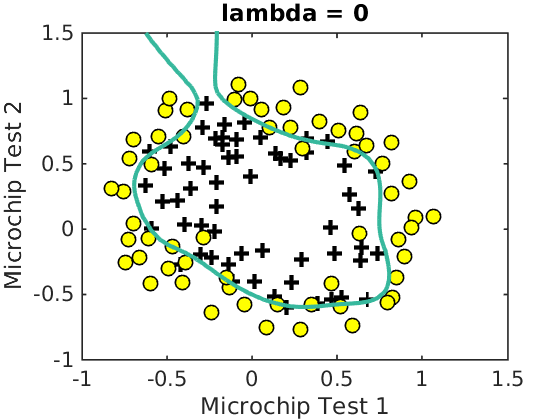

Solver stopped prematurely.

fminunc stopped because it exceeded the iteration limit,
options.MaxIter = 400 (the selected value).

Train Accuracy: 87.288136

In [6]:
lambda = 0;

initial_theta = zeros(size(X_feats, 2), 1);
options = optimset('GradObj', 'on', 'MaxIter', 400);
[theta, J, exit_flag] = fminunc(@(t)(funcs_04_RegularizedLogisticRegression_costFunctionReg(t, X_feats, y, lambda)), initial_theta, options);

% Compute accuracy on our training set
p = sigmoid(X_feats*theta);
p(p>=0.5)=1; p(p<0.5)=0; 

fprintf('Train Accuracy: %f\n', mean(double(p == y)) * 100);

% Plot
z = reshape(uv*theta, 50, 50);

figure; hold on;

plot(X(pos, 1), X(pos, 2), 'k+','LineWidth', 2, 'MarkerSize', 7);
plot(X(neg, 1), X(neg, 2), 'ko', 'MarkerFaceColor', 'y', 'MarkerSize', 7);
contour(u, v, z, [0, 0], 'LineWidth', 2)
        
title(sprintf('lambda = %g', lambda))
xlabel('Microchip Test 1')
ylabel('Microchip Test 2')
hold off;
box on

#### Two much regularization: underfitting

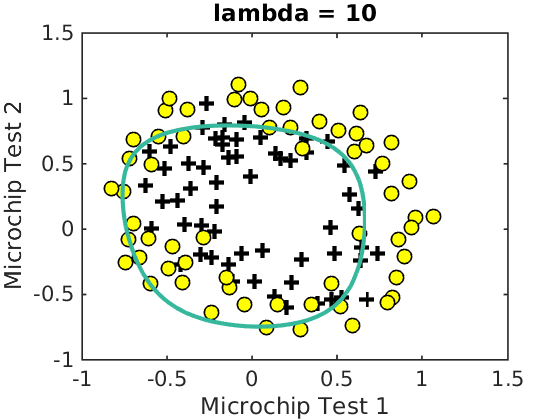

Local minimum possible.

fminunc stopped because the final change in function value relative to 
its initial value is less than the default value of the function tolerance.



Train Accuracy: 74.576271

In [7]:
lambda = 10;

initial_theta = zeros(size(X_feats, 2), 1);
options = optimset('GradObj', 'on', 'MaxIter', 400);
[theta, J, exit_flag] = fminunc(@(t)(funcs_04_RegularizedLogisticRegression_costFunctionReg(t, X_feats, y, lambda)), initial_theta, options);

% Compute accuracy on our training set
p = sigmoid(X_feats*theta);
p(p>=0.5)=1; p(p<0.5)=0; 

fprintf('Train Accuracy: %f\n', mean(double(p == y)) * 100);

% Plot
z = reshape(uv*theta, 50, 50);

figure; hold on;

plot(X(pos, 1), X(pos, 2), 'k+','LineWidth', 2, 'MarkerSize', 7);
plot(X(neg, 1), X(neg, 2), 'ko', 'MarkerFaceColor', 'y', 'MarkerSize', 7);
contour(u, v, z, [0, 0], 'LineWidth', 2)
        
title(sprintf('lambda = %g', lambda))
xlabel('Microchip Test 1')
ylabel('Microchip Test 2')
hold off;
box on

##Required function <a id='functions'></a>

#### funcs_04_LogisticRegressionRegularized_costFunctionReg.m <a id='funcs_04_LogisticRegressionRegularized_costFunctionReg.m'></a>

In [8]:
% function [J, grad] = funcs_04_LogisticRegressionRegularized_costFunctionReg(theta, X, y, lambda)
%     %COSTFUNCTIONREG Compute cost and gradient for logistic regression with regularization
%     %   J = COSTFUNCTIONREG(theta, X, y, lambda) computes the cost of using
%     %   theta as the parameter for regularized logistic regression and the
%     %   gradient of the cost w.r.t. to the parameters. 
% 
%     % Define sigmoid function
%     sigmoid=@(z) 1./(1+exp(-z));
%     m = length(y); % number of training examples  
%     J = 1/m*sum(-y.*log(sigmoid(X*theta))-(1-y).*log(1-sigmoid(X*theta)))+lambda/(2*m)*(theta(2:end)'*theta(2:end));
%     
%     grad1=1/m*X(:,1)'*(sigmoid(X*theta)-y); % dJ(theta)/dtheta_j,j=0
%     grad2=1/m*X(:,2:end)'*(sigmoid(X*theta)-y)+lambda/m*theta(2:end); % dJ(theta)/dtheta_j,j>0
%     grad=[grad1; grad2];
% end